## Project:-
- Comprehensive Evaluation of Machine Learning
- Select the Best Regression Model on Tips Dataset.
### Author:- 
- Mohsin Shareef
### Contact info:-
- [Kaggle](https://www.kaggle.com/mohsin31202)
- [Github](https://github.com/MohsinShareef)
- [Linkedin](www.linkedin.com/in/mohsin-shareef-9231a1294)

### Introduction:- 
The primary objective of this notebook is to conduct a thorough evaluation of various machine learning regression models, to identify the most accurate algorithm for predicting the target variable. 

### Goals:-
- Compare the range of differant machine learning algorithms for regression  tasks.
- To select the top-performing model based on key performance metrics.
- To apply the chosen model to dummy data for prediction validation.
### Regression Algorithms use in notebook:- 
- Linear Regression
- Support Vector Regression (SVR)
- Decision Tree Regression
- Random Forest Regression
- Gradient Boosting Regression
- AdaBoost Regression
- KNN Regression (K-Nearest Neighbors)
- XGBoost Regression
- CatBoost Regression
- LightGBM Regression

### Dataset Overview
- The dataset urder scrutiny is the tips dataset.
- This dataset is taken from seaborn library.
- The key features included in the dataset are as follows:
  - `total_bill`:- Total bill of your food and services.
  - `tip`:- Given tip on the base of service.
  - `sex`:- Gender of costomer.
  - `smoker`:- Costomer are smoker or non smoker.
  - `day`:- Which day costomer arrivel.
  - `time`:- Time of dinning, Dinner Lunch
  - `size` Size of table how many person on one table.

### Data Preprocessing
- Check the missing values
- Check the outliers 
- Data Distribution
- Feature Engineering if we need

### Load the important libraries

In [118]:
# Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Load ML libraries for regression task
from sklearn.model_selection import  train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder , QuantileTransformer, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor


import pickle
import warnings
warnings.filterwarnings('ignore')
import traceback


- Load the tips dataset from seaborn library

In [119]:
# Load the data set
df = sns.load_dataset('tips')

In [120]:
# First look of data
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [121]:
# Get the shape of the DataFrame, containing the number of rows and columns
df.shape
# Print a heading for the DataFrame information section
print('Dataframe Information') 
print('------------------------')
print(f"• Total entries: {df.shape[0]}") 
print(f"• Total columns: {df.shape[1]}")

Dataframe Information
------------------------
• Total entries: 244
• Total columns: 7


In [122]:
# Check the details information of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [123]:
# Print the data types of each column
def feachers_data_types(df):
    # Count the number of categorical column
    cat_count = df.select_dtypes(include='category').shape[1]
    # Count the number of float column
    float_count = df.select_dtypes(include='float').shape[1]
    # Count the number of integer column
    int_count = df.select_dtypes(include='int').shape[1]
    
    # Print the data types of each column
    print(f"• Total feachers: {df.shape[1]}")
    print(f"• Categorical columns: {cat_count}")
    print(f"• Float columns: {float_count}")
    print(f"• Integer columns: {int_count}")

# Call the function 
print('Data Summary')
print('------------------------')
feachers_data_types(df)


Data Summary
------------------------
• Total feachers: 7
• Categorical columns: 4
• Float columns: 2
• Integer columns: 1


## Tips Dataset Features

In [124]:
# Rename the columns 
df.rename(columns={'total_bill':'Total_Bill','tip':'Tip','sex':'Sex','smoker':'Smoker','day':'Day','time':'Time','size':'Size'}, inplace=True)
# Retrieve and store the list of updated column names from the DataFrame
cols = df.columns.tolist()
# Display the updated column names with a heading
print("Updated Tips Dataset Columns")
# Iterate and print each column name with a bullet point
for col in cols:
    print("- " + col)

Updated Tips Dataset Columns
- Total_Bill
- Tip
- Sex
- Smoker
- Day
- Time
- Size


### Statistics Summary 


In [125]:
# print the summary statistics of the DataFrame
df.describe()

,Total_Bill,Tip,Size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Observation Statistics
- Three columns/attributes are numarical
- Mean of `Total_Bill` is 19.785943 and std is 8.902412
- Minimum bill is 3.070000 and maximum bill is 50.810000
- Mean of `Tip` is 2.998279 and std is 1.383638
- Minimum tip is 1.000000 and maximum tip is 10.000000
- Mean of `Size` 2.569672 and std is 0.951100
- Minimum  table size is 1.000000 and maximum is 6.000000

Correlation Matrix


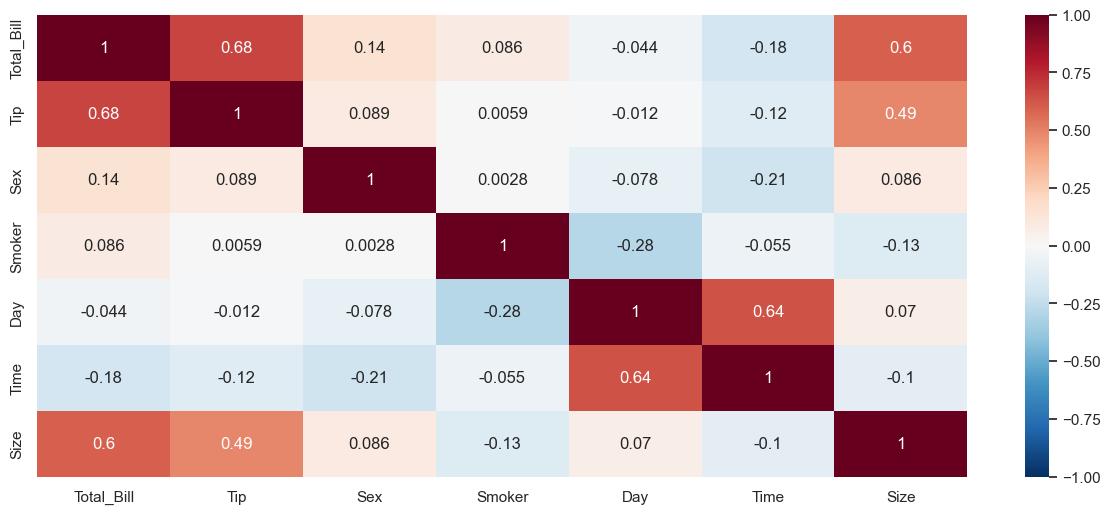

In [126]:
# Define a function to encode categorical columns using LabelEncoder
def encode_columns(df, cols):
  # Instantiate the LabelEncoder
  le = LabelEncoder()
  
  for col in cols:
    # Apply LabelEncoder to each column and update the DataFrame in place
    df[col] = le.fit_transform(df[[col]])
  # Return the modified DataFrame with encoded columns
  return df


# copy the dataset to a new dataframe for plotting correlation matrix
df_corr = df.copy()
# create a list of categorical features by checking the data type
cat_cols = df_corr.select_dtypes(include=['object', 'category']).columns.tolist()

# Use label encoder to ordinal features
le = LabelEncoder()
df_corr = encode_columns(df_corr, cat_cols)

# plot crr matrix to see the correlation between the variables
print("Correlation Matrix")
corr = df_corr.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.show()

<center>Figure 1. <b>Correlation Matrix</b></center>

### Correlation Observations
- Highest correlation 0.68% between `Total_Bill` and `Tip`
- Sronge correlation 0.64% between `Time` and `Day`
- `Size` and `Tip` 0.49% positive correlation
- Nagitive correlation between `Day` and `Smoker` -0.28%

### Check the Missing values

Total_Bill    0
Tip           0
Sex           0
Smoker        0
Day           0
Time          0
Size          0
dtype: int64


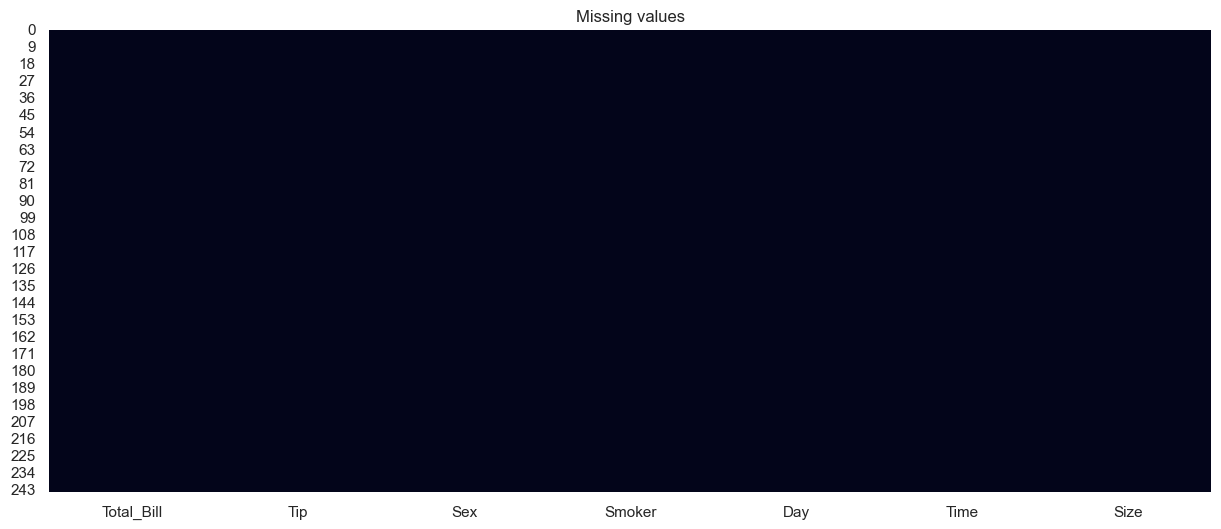

In [127]:
# Check the missing values
print(df.isnull().sum())
# Plotting heatmap to check missing values after imputation
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing values')
plt.show()

<center>Figure 2. <b>Missing Values Inspection</b></center>

In [128]:
# Get the numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Calculate the skewness for each numerical column
skewness = df[numerical_cols].skew()

# Create a DataFrame with skewness values as a single row
skewness_df = pd.DataFrame({'Skewness': skewness})

# Print the skewness DataFrame
print("Data Distribution - Skewness")
round(skewness_df,3)

Data Distribution - Skewness


,Skewness
Total_Bill,1.133
Tip,1.465
Size,1.448


- The Tips dataset with skewness values of 1.133, 1.465, and 1.448 exhibit positive skewness, indicating right-skewed distributions
### Plotting Distribution

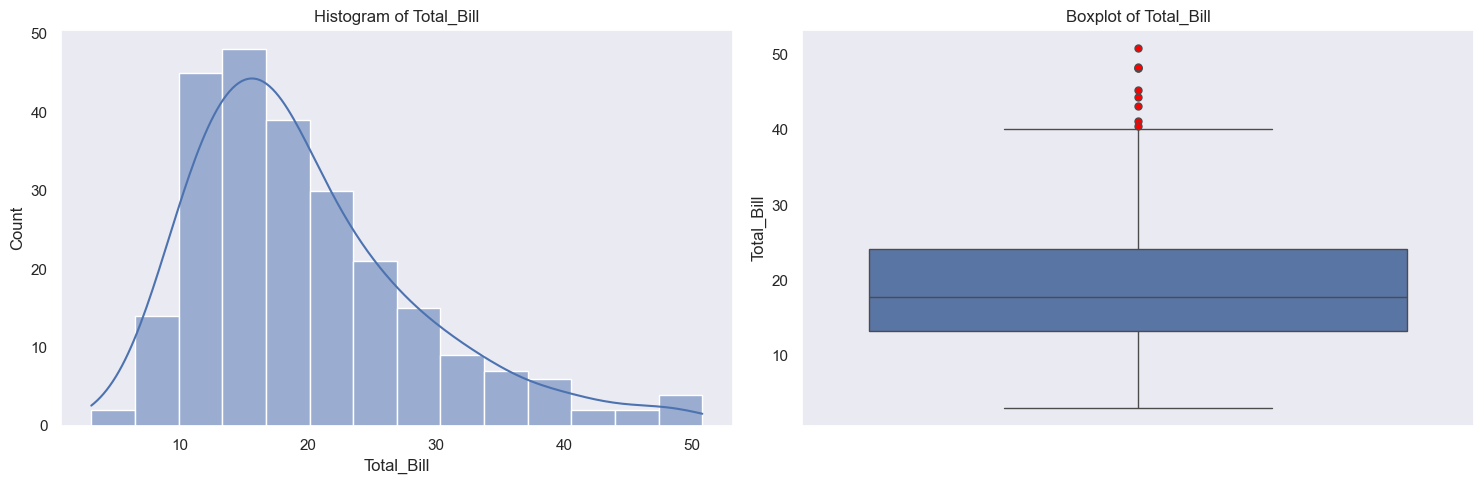

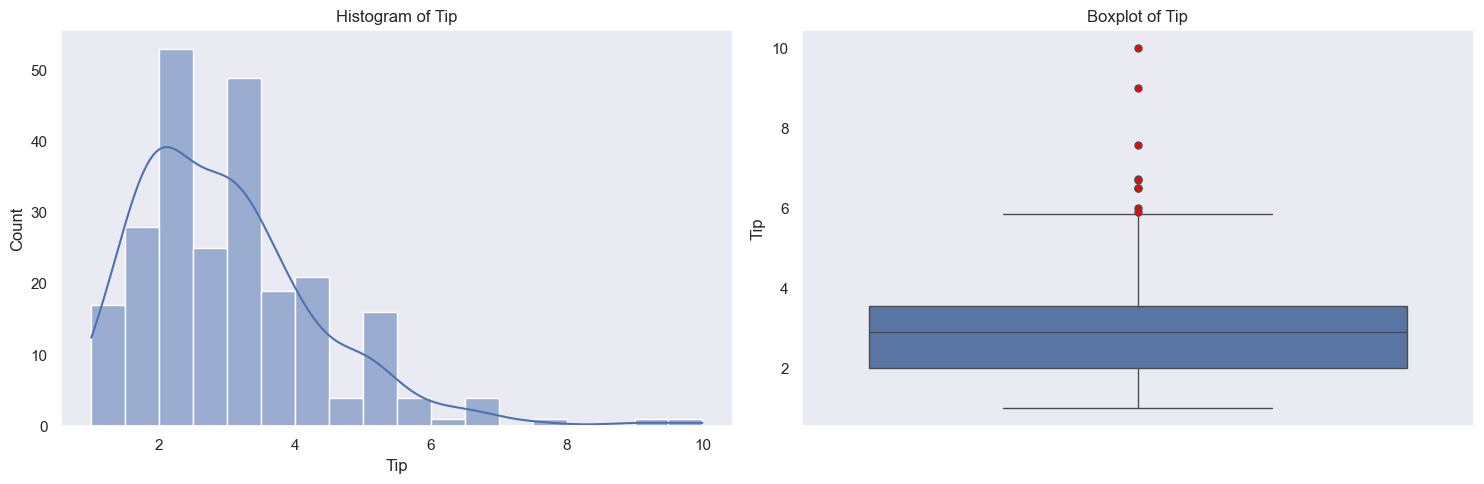

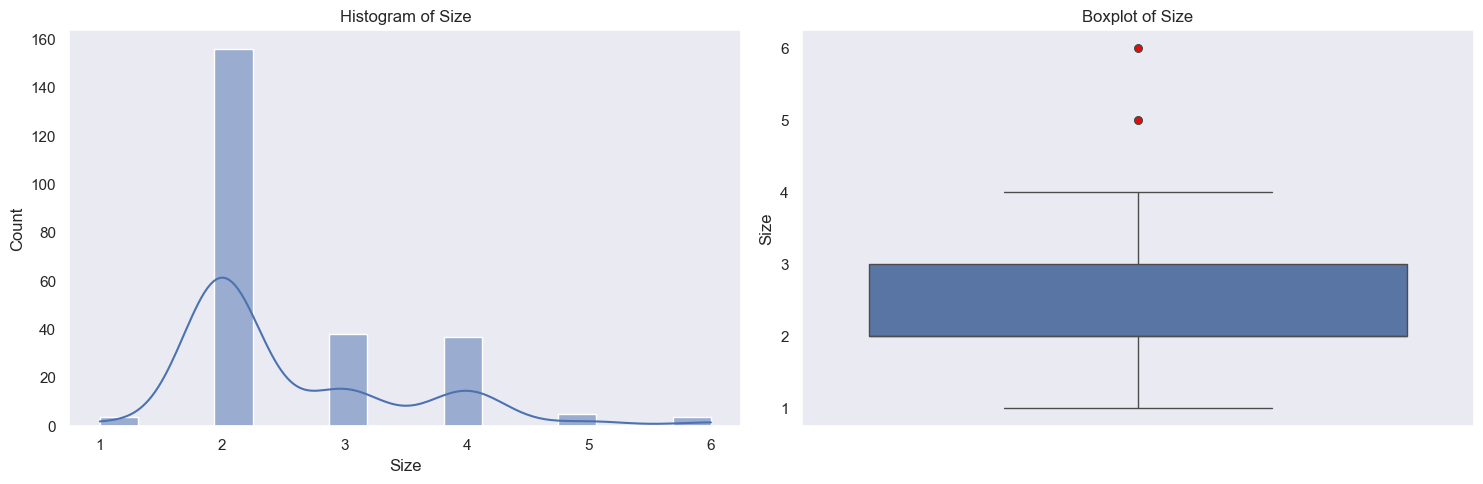

In [129]:
# Define a function to plot histogram and boxplot
def plot_histogram_and_boxplot(data):
    # Select only numerical columns
    numerical_columns = data.select_dtypes(include="number").columns
    # Loop through each numerical column

    for column in numerical_columns:
        # Create subplots for histogram and boxplot
        fig, axes = plt.subplots(1, 2, figsize=(15, 5))

        # Histogram plot
        sns.histplot(data=data, x=column, kde=True, ax=axes[0])
        axes[0].set_title(f"Histogram of {column}")

        # Boxplot plot
        sns.boxplot(data=data, y=column, ax=axes[1], flierprops=dict(marker='o', markerfacecolor='red', markersize=5))
        axes[1].set_title(f"Boxplot of {column}")

        plt.tight_layout()
        plt.show()

# Call the function to plot histogram and boxplot
plot_histogram_and_boxplot(df)

<center>Figure 3. <b>Histogram and Boxplot</b></center>

- Data Preprocessing for Machine Learning

In [130]:
df.head()

,Total_Bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [131]:
# lebel encoding the categorical columns using for loop
for column in df.select_dtypes(include='category').columns:
  df[column] = LabelEncoder().fit_transform(df[column])

df.head()

,Total_Bill,Tip,Sex,Smoker,Day,Time,Size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [132]:
# Split the data into features and target
X = df.drop('Tip', axis=1)
y = df['Tip']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Comprehensive Model Evaluation
- Regression Models and Hyperparameters Configuration

In [133]:
# Dictionary of regression models with their respective hyperparameters for grid search
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': { }
    },
    'Support Vector Regression': {
        'model': SVR(),
        'params': {
            'model__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
        }
    },
    'Decision Tree Regression': {
        'model': DecisionTreeRegressor(),
        'params': {
            'model__splitter': ['best', 'random'],
            'model__max_depth': [None, 1, 2, 3],
        }
    },
    'Random Forest Regression': {
        'model': RandomForestRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
        }
    },
    'Gradient Boosting Regression': {
        'model': GradientBoostingRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__max_depth': [None, 1, 2, 3],
        }
    },
    'AdaBoost Regression': {
        'model': AdaBoostRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
        }
    },
    'K-Nearest Neighbors Regression': {
        'model': KNeighborsRegressor(),
        'params': {
            'model__n_neighbors': [3, 5],
        }
    },
    'XGBoost Regression': {
        'model': XGBRegressor(),
        'params': {
            'model__n_estimators': [10, 100],
            'model__depth': [None, 1, 2, 3],
        }
    },
    'CatBoost Regressor' :{
        'model' : CatBoostRegressor(),
        'params':{
            'model__iterations': [10, 100],
            'model__depth': [None, 1, 2, 3], 
        }
    },
    'LightGBM Regressor':{
        'model': LGBMRegressor(),
        'params':{
            'model__n_estimators': [10],
            'model__max_depth': [None, 1, 2, 3], 
            'model__learning_rate': [0.1, 0.2, 0.3],
            'model__verbose': [-1],
        }
    },

}

In [134]:
%%time
# Create an empty list to store the model scores
model_scores = []
# Best regressor model and best R2 score
best_r2_score = -float('inf')
best_regressor = None

# iterate over the models
for name, model in models.items():
    try:
        # Create a pipeline with the model
        pipeline = Pipeline([
        ('model', model['model'])
    ])
    # Perform grid search
    # grid = GridSearchCV(pipeline, model['params'], cv=5, n_jobs=-1)
        grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=model['params'],
        cv=5,  # Number of cross-validation folds
        scoring='neg_mean_absolute_error',  # Scoring metric to optimize
        verbose=0,
        n_jobs=-1,  # Use all available cores for parallel processing
        error_score='raise'
    )

    # Fit the grid search object to the data
        grid_search.fit(X_train, y_train)
    # predict on the test data
        y_pred = grid_search.predict(X_test)
        r2 = r2_score(y_test, y_pred)
    # Append the model score to the list
        model_scores.append({
        'Model': name,        
        'MAPE': mean_absolute_percentage_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2,
    })
    # Update the best regressor model and best R2 score
        if r2 > best_r2_score:
            best_r2_score = r2
            best_regressor = grid_search.best_estimator_
    except Exception as e:
        traceback.print_exc()

# sort the model scores in descending order
sorted_models = sorted(model_scores, key=lambda x: x['Model'], reverse=False)
# Convert the sorted model performance list to a DataFrame
metrics = pd.DataFrame(sorted_models)
# Best performing model
best_reg_model = max(sorted_models, key=lambda x: x['R2'])
print("Regression Models Performance")
print("--------------------------")
metrics.round(2)


Learning rate set to 0.5
0:	learn: 1.2016663	total: 1.33ms	remaining: 11.9ms
1:	learn: 1.0800739	total: 2.52ms	remaining: 10.1ms
2:	learn: 1.0024452	total: 3.31ms	remaining: 7.73ms
3:	learn: 0.9513717	total: 4.41ms	remaining: 6.61ms
4:	learn: 0.9256727	total: 5.51ms	remaining: 5.51ms
5:	learn: 0.9065282	total: 5.95ms	remaining: 3.96ms
6:	learn: 0.8912825	total: 6.54ms	remaining: 2.8ms
7:	learn: 0.8721188	total: 7.11ms	remaining: 1.78ms
8:	learn: 0.8609508	total: 8.19ms	remaining: 910us
9:	learn: 0.8511335	total: 8.78ms	remaining: 0us
Regression Models Performance
--------------------------
CPU times: total: 1.59 s
Wall time: 25.8 s


,Model,MAPE,MAE,R2
0,AdaBoost Regression,0.36,0.79,0.22
1,CatBoost Regressor,0.32,0.74,0.31
2,Decision Tree Regression,0.30,0.70,0.38
3,Gradient Boosting Regression,0.31,0.71,0.37
4,K-Nearest Neighbors Regression,0.32,0.73,0.33
5,LightGBM Regressor,0.31,0.68,0.45
6,Linear Regression,0.28,0.67,0.44
7,Random Forest Regression,0.32,0.73,0.32
8,Support Vector Regression,0.27,0.67,0.45
9,XGBoost Regression,0.28,0.65,0.47


In [135]:
print(f"Model: {best_reg_model['Model']}")
print(f"MAPE: {best_reg_model['MAPE']:.2f}")
print(f"MAE: {best_reg_model['MAE']:.2f}")
print(f"R2 Score: {best_reg_model['R2']:.2f}")

Model: XGBoost Regression
MAPE: 0.28
MAE: 0.65
R2 Score: 0.47
